<a href="https://colab.research.google.com/github/Glasiermedic/Traffic-Fatality-Capstone/blob/master/Fatality_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# National Motor Vehicle Accident Fatality 2017
###The National Traffic Safety Administration has setup Fatality Analysis Reporting (FARS) which collects fatal motor vehicle accidents data.  The primary contributors to the database are law enforcement agencies and state agencies across the nation. This data set is interesting because it combines a wide variety of variables around motor vehicle accidents including the detailed location and time of the accident, multiple contributing factors to the accident and multiple weather and lighting factors.  For the intent of this capstone project we are focusing on the states, time of year, day in the month, day of the week, the time of the day, number of vehicles and the number of fatalities. 
###We can use this data to help answer important questions about traffic accident deaths and ways to avoid them.  For instance is there a specific time that is more dangerous? Can we predict that as more motor vehicles are involved the greater chance of a fatality?  For each season what are the states with the highest fatalities? 




In [0]:
#@title
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

import seaborn as sns

#!apt install proj-bin libproj-dev libgeos-dev

#!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
 

In [0]:
#@title
#!apt-get -qq install -y mpl_toolkits.basemap

In [0]:
#@title
#@t
#filtering the daa set as it is imported to improve the load time and efficiency
acci = pd.read_csv('https://raw.githubusercontent.com/Glasiermedic/Data-visualization-examples/master/accident.csv', usecols=[0, 1,2,5,8, 9, 10, 11, 12,13, 14,15,16,18, 25, 26, 28, 29,35,36,37,38,47,48,49, 50, 51])

In [0]:
#@title
#filtering the daa set as it is imported to improve the load time and efficiency
acci2 = pd.read_csv('https://raw.githubusercontent.com/Glasiermedic/Data-visualization-examples/master/accident.csv',)
                    #usecols=[0, 1,2,5,8, 9, 10, 11, 12,13, 14,15,16,18, 25, 26, 28, 29,35,36,37,38,47,48,49, 50, 51])

In [0]:
#@title
#acci.info()

In [0]:
#@title

acci = acci.rename( columns={'ST_CASE':'case_id', 'VE_TOTAL': 'Total_Vehicles', 'PEDS': 'Pedestrians', 'RUR_URB':'Rural_or_Urban', 'LONGITUD':'longitude', 'HARM_EV':'First_Harmful_Event', 'LGT_COND': 'Lighting_Conditions', 'CF1': 'First_Contributor', 'CF2': 'Second_contributor', 'CF3': 'third_contributor', 'MAN_COLL':'Manner_Collision','DRUNK_DR':'drunk_drivers', 'FATALS':'fatalities'})
acci2 = acci2.rename( columns={'ST_CASE':'case_id', 'VE_TOTAL': 'Total_Vehicles', 'PEDS': 'Pedestrians', 'RUR_URB':'Rural_or_Urban', 'LONGITUD':'longitude', 'HARM_EV':'First_Harmful_Event', 'LGT_COND': 'Lighting_Conditions', 'CF1': 'First_Contributor', 'CF2': 'Second_contributor', 'CF3': 'third_contributor', 'MAN_COLL':'Manner_Collision','DRUNK_DR':'drunk_drivers', 'FATALS':'fatalities'})

In [0]:
#@title

acci.columns = acci.columns.str.lower()
acci2.columns = acci2.columns.str.lower()

In [0]:
#@title
# { vertical-output: true }
# creating dictionaries for use in mapping to variables and creating a chart of values as needed
state_id ={1:'AL', 2:'AK', 4:'AZ', 5:'AR', 6:'CA', 8:'CO', 9:'CT', 10:'DE', 11:'DC', 12:'FL', 13:'GA', 15:'HI', 16:'ID', 17:'IL', 18:'IN', 19:'IA', 20:'KS', 21:'KY', 22:'LA', 23:'ME', 24:'MD', 25:'MA', 26:'MI', 27:'MN', 28:'MS', 29:'MO', 30:'MT', 31:'NE', 32:'NV', 33:'NH', 34:'NJ', 35:'NM', 36:'NY', 37:'NC', 38:'ND', 39:'OH', 40:'OK', 41:'OR', 42:'PA', 43:'PR', 44:'RI', 45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT', 50:'VT', 51:'VA', 52:'VI', 53:'WA', 54:'WV', 55:'WI', 56:'WY'}
state_id2 ={1:'Alabama', 2:'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Delaware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Puerto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 52:'Virgin Islands', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming'}
weekday_id = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
month_id = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
weather_id = {1: 'clear', 0: 'no additional conditions', 2:'rain', 3: 'sleet hail', 4:'snow', 5: 'Fog, smog, smoke', 6:'severe crosswinds', 7:'Blowing Sand,Soil,Dirt', 8:'other', 10:'cloudy', 11:'blowing snow', 12: 'Freezing Rain,drizzle', 98:'not reported', 99:'Unknown'}
cf_id = {0:'none', 1:'Inadequate warning', 2:'Shoulder related', 3:'Other Maintenance-construction', 4:'Pavement marking not visible',5:'Surface Under water',6: 'inadequate street', 7:'Surface Washed out', 13:'Aggressive uninvolved driver', 14:'vehicle vs. falling cargo', 15:'Non_occupant vs falling cargo', 16:'non_occupant struck vehicle', 17:'vehicle set in motion by non-driver', 18:'date of crash not date of 911 call', 20:'police pursuit involved', 21:'In School Zone', 22:'speed limit posted', 23:'stalled-disabled vehicle', 24:'situation and harm occured off roadway', 25:'Toll booth/plaza related', 26:'backup due to prior non recurring incident', 27:'back up due to prior crash', 28:'backup due to regular congestion', 99:'unknown',}
ma_col_id = {0:'Collision not with transporting vehicle', 1:'Front-rear', 2:'Front-front', 6:'Angle', 7:'Sideswipe-same', 8:'Sideswipe-opposite', 9:'Rear-side', 10:'Rear-rear', 11:'Other', 98:'Not reported', 99:'Unknown' }
first_h_id ={1:'Rollover', 2:'Fire/explosion', 3:'Immersion', 4:'Gas inhalation', 5:'Fell/jumped from vehicle', 6:'Non collision injured in vehicle', 7:'Other non collsion', 8:'Pedestrian', 9:'Pedalcyclist', 10:'Railway vehicle', 11:'Live animal', 12:'Motor vehicle in transport', 14:'Parked motor vehicle', 15:'Non motorist on Personal conveyance', 16:'Thrown or falling object', 17:'Boulder', 18:'Other non fixed object', 19:'Building',  20:'Impact attenuator', 21:'Bridge pier or abutment', 23:'Bridge rail', 24:'Guardrail', 25:'Contrete Barrier', 26:'Other Barrier', 30:'Utility pole', 31:'Other post or support', 32:'Culvert', 33:'Curb', 34:'Ditch', 35:'Embankment', 38:'Fence', 39:'Wall', 40:'Fire Hydrant', 41:'Shrubbery', 42:'Tree(standing)', 43:'Other fixed object', 44:'Pavement surface issues', 45:'Working Motor Vehicle', 46:'Traffic signal support', 48:'Snow bank', 49:'Ridden animal or animal driven', 50:'Bridge overhead structures', 54:'Striking cargo, persons, objects in motion from/by another vehicle', 57:'Cable barrier', 58:'Ground', 59:'Traffic sign support', 72:'Cargo loss or shift', 73:'Object Fallen from moving vehicle', 74:'Road vehicle on rails', 91:'Uknown non fixed', 93:'Unknown fixed', 99:'Unknown'}

In [0]:
#@title

# adding a date variable by combining the day month and year

acci['date'] =pd.to_datetime(acci[['day', 'month', 'year']])


In [0]:
#@title
#acci['weather'][:10]
#acci['weather'].map(weather_id).describe()

#Initial Analysis of the data
### The data is only from 2017. The Data represents the fifty states, the District of Columbia, Puerto Rico and the Virgin Islands. There were 34247 fatal incidents reported.  The data is from the Nathional Highway and Transportation Safety Administration and represents one portion of their data set. I have filtered the data set variables to improve performance.  You can get the full data set from NHTSA website (ftp://ftp.nhtsa.dot.gov/fars/2017/National/FARS2017NationalCSV.zip)

### THe date shows that 38.5% of the incidents involved two individuals and  less than 10% of fatal incidents involved more than four individuals.   When it comes to the number of vehicles involved in fatal incidents 55.0% of the incidents involve a single vehicle.  It is also important to note that there is as substantial gap between two vehicles (36.4%) and three vehicles (6.26%).  



In [0]:
#@title
#create new variable combining all the people in vehicles and pedestrians
acci['total_people'] = acci['pedestrians'] + acci['persons']
# initial evaluation of data
#acci['total_people'].mode()
acci['total_people'].describe().to_frame()
percent_people= (acci['total_people'].value_counts()/34247)*100
print('frequency of the number of people involved')
percent_people.to_frame()[:10]

frequency of the number of people involved


,total_people
2,38.528922
1,26.843227
3,17.143107
4,8.085380
5,4.292347
6,2.257132
7,1.191345
8,0.674512
9,0.335796
10,0.230677


In [0]:
#@title
# initial evaluation of data
#acci['persons'].max()
print ('The percentage of vehicle occupants  per incident')
acci['total_people'].describe().to_frame()
percent_vehicle= (acci['total_vehicles'].value_counts()/34247)*100
percent_vehicle.to_frame()[:10]

The percentage of vehicle occupants  per incident


,total_vehicles
1,55.020878
2,36.406109
3,6.263322
4,1.471662
5,0.455514
6,0.178118
7,0.099279
8,0.032120
9,0.026280
10,0.017520


In [0]:
#@title
#viewing the variables after applying the filter
#acci.columns.to_frame()

### Looking at how the weather relates to fatal incidents the majority of accident are occuring when the weather is clear.  The second most common condition is cloudy and rain is the third most common. The absence of adverse weather is not what most would expect to lead to more accidents.  To further understand this finding we may need to look at the relationship between weather and driving behavior and tendency to drive less with adverse weather conditions.  We could also look at how number of fatal accidents in adverse weather for specific regions may come into play like snow and ice in Arizona and other southern states.   

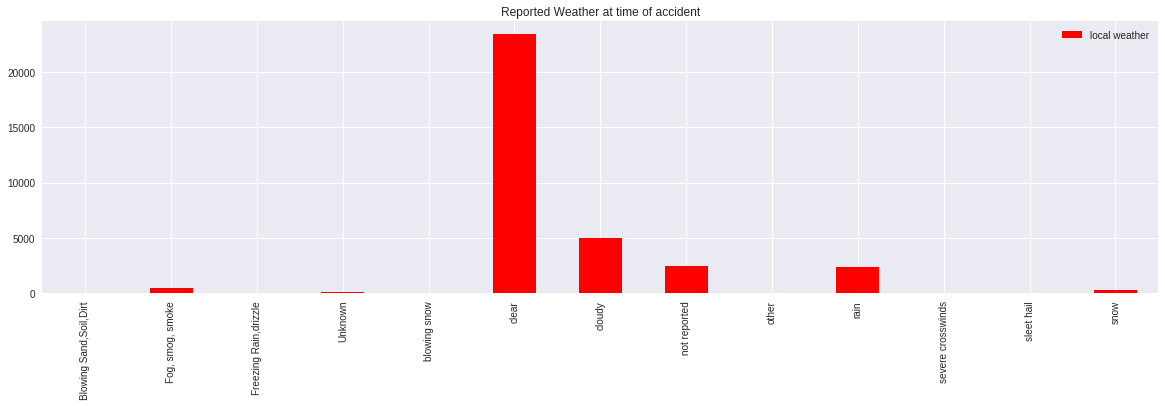

In [0]:
#@title 
acci['local weather']=acci['weather1']
weather1_sum=acci['local weather'].map(weather_id).value_counts().to_frame()
weather1_sum.sort_index(inplace =True)

weather2_sum=acci['weather2'].map(weather_id).value_counts().to_frame()
weather2_sum.sort_index(inplace =True)

weather1_sum.append(weather2_sum)

weather1_sum.plot(kind='bar', color ='red', title='Reported Weather at time of accident', figsize=(20, 5), )
plt.show()


###  We can also look at other contributing factors outside the weather.  When the officers in the field completed their report a majority of them selected "none" for the contributing factors affecting the driver.  When we look for the next most common factors the data points to: running into fallen cargo, unknown factors, police pursuits and disabled/stalled vehicles.  

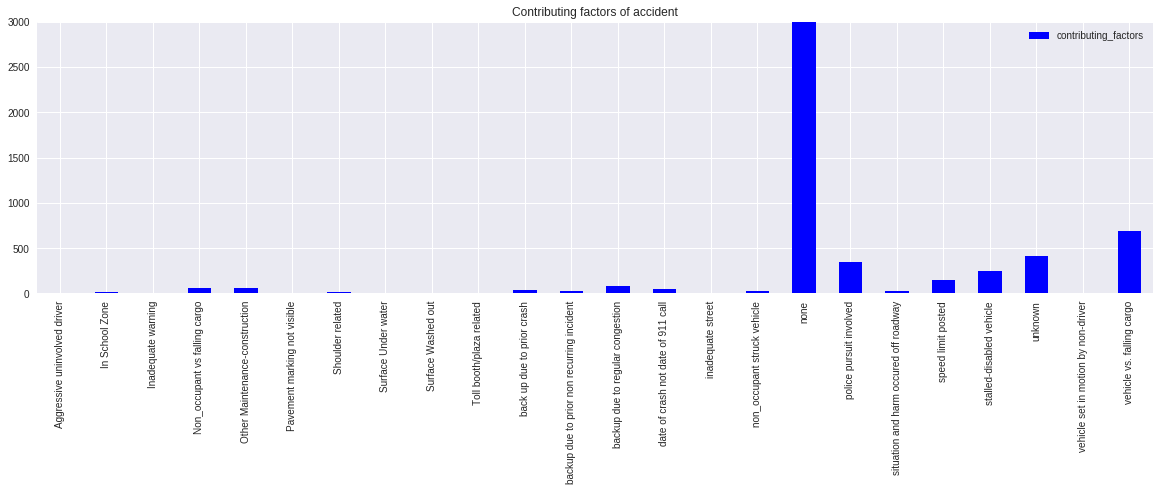

In [0]:
#@title
contributor1_sum.plot(kind='bar', color ='blue', title='Contributing factors of accident', figsize=(20, 5)) 
plt.ylim(0,3000)
plt.show()

In [0]:
#@title
acci['contributing_factors']=acci['first_contributor']
contributor1_sum=acci['contributing_factors'].map(cf_id).value_counts().to_frame()
contributor1_sum.sort_index(inplace =True)

contributor2_sum=acci['second_contributor'].map(cf_id).value_counts().to_frame()
contributor2_sum.sort_index(inplace =True)

contributor3_sum=acci['third_contributor'].map(cf_id).value_counts().to_frame()
contributor3_sum.sort_index(inplace =True)

contributor1_sum.append(contributor2_sum)
contributor1_sum.append(contributor3_sum)
contributor1_sum.sort_index(inplace=True)
contributor1_sum['contributing_factors'][14:-1].to_frame()





,contributing_factors
inadequate street,5
non_occupant struck vehicle,32
none,31637
police pursuit involved,350
situation and harm occured off roadway,32
speed limit posted,149
stalled-disabled vehicle,249
unknown,416
vehicle set in motion by non-driver,1


##What about the collision itself are the most common factors in fatal accidents?  
### Based on the data reported for 2017 striking another moving vehicle is the most common first harmful event in a car accident.  Nearly 39.7% of fatal accidents involved striking another moving vehicle first.  Striking pedestrians is the second most common first harmful event, nearly 16.4%; Followed by  rolling the vehicle over (8.2%) and striking a tree (7.2%).  



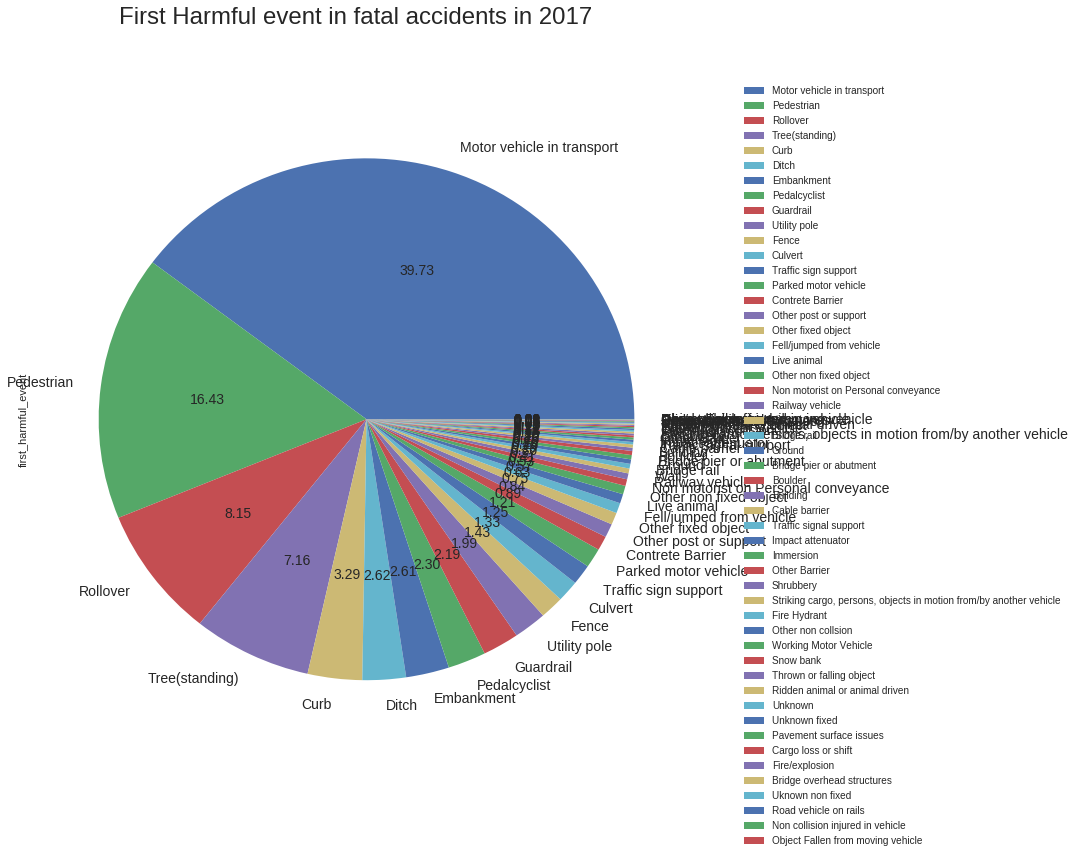

In [0]:
#@title
firharm= acci['first_harmful_event'].map(first_h_id).value_counts().to_frame()[:15]
#firharm_percent['percentage of first harmful events'] =(firharm['first_harmful_event']/34247)*100

firharm= acci['first_harmful_event'].map(first_h_id).value_counts().to_frame().plot.pie(autopct='%.2f', 
                                                              fontsize =14, subplots=True, figsize=(12, 12),)
plt.legend(bbox_to_anchor=(1.05,1.025), loc="upper left")
plt.suptitle('First Harmful event in fatal accidents in 2017', fontsize=24)
plt.show()


### In a majority of the fatal accidents where the vehicle collided with another moving vehicle it was at an angle and sligthtly less common for the vehicles to collide straight at eachother in a head on collision or a rear end collision.    From this data we can predict that you are more likely to have a fatal accident where your car and another car collide at an angle.  

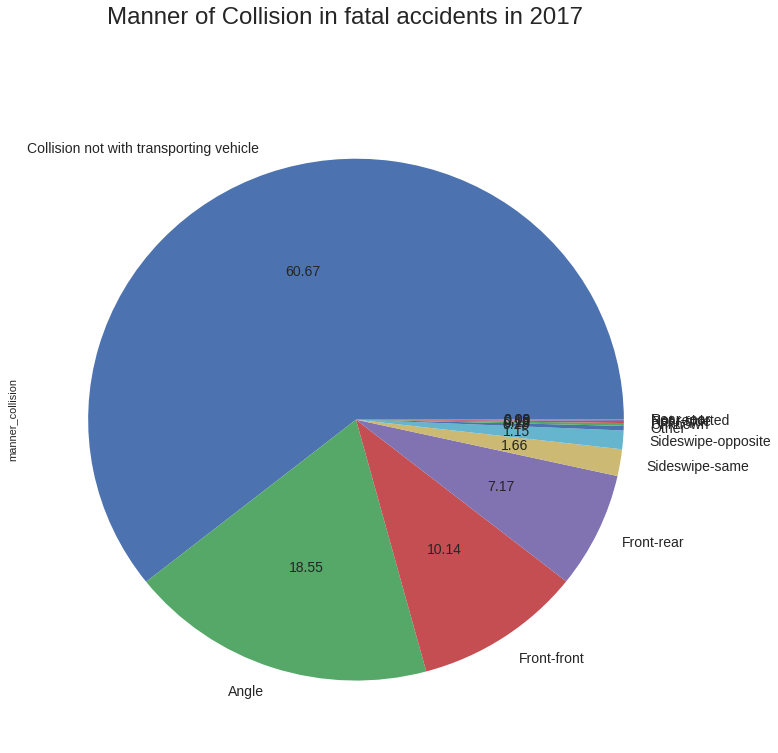

In [0]:
#@title
mancol=acci['manner_collision'].map(ma_col_id).value_counts().to_frame()[:10]
#mancol_percent['percentage of first harmful events'] =(firharm['manner_collision']/34247)*100

mancol2= acci['manner_collision'].map(ma_col_id).value_counts().to_frame().plot.pie(autopct='%.2f', 
                                                              fontsize =14, subplots=True, figsize=(12, 12), legend=False)
plt.suptitle('Manner of Collision in fatal accidents in 2017', fontsize=24)
plt.show()


In [0]:
#@title
# initial evaluation of data
#acci['pedestrians'].describe().to_frame()

In [0]:
#@title
#acci['drunk_drivers'].describe().to_frame()

In [0]:
#@title
#drunk_count=(acci['drunk_drivers'].value_counts()/34247)*100
#print("Precentage of fatal accidents per number of drunk drivers involved")
#drunk_count.to_frame()


In [0]:
#@title
# initial evaluation of data
fatal_count=(acci['fatalities'].value_counts()/34247)*100
print("Precentage of the number of deaths in fatal accidents ")
fatal_count.to_frame()

Precentage of the number of deaths in fatal accidents 


,fatalities
1,93.184805
2,5.626770
3,0.881829
4,0.221917
5,0.072999
6,0.008760
13,0.002920


In [0]:
#@title
#
#acci['total_vehicles'].value_counts().to_frame().plot.pie(autopct='%.2f', title='freqency of the number of vehicles involved in accidents in 2017',
                                                              #fontsize =20, subplots=True, figsize=(12, 12))
#plt.suptitle('Number of vehicles involved in accidents in 2017', fontsize=24)

#acci['county'].value_counts()[:10].to_frame().plot(kind='bar', color ='red', title='top 10 counties for accidents in 2017', figsize=(10, 5))
#The county codes reference multiple counties across the nation and would need to be sorted first by state and then by county making the dictionary more complicated.

#plt.show()

## How does the time of year, day of the month, day of the month related to the fatal accidents?
### Based on the data the highest number of fatalities in a month is in July followed by September and October .  

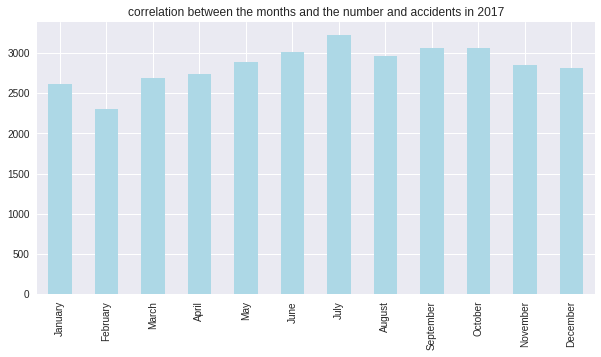

In [0]:
#@title
hour_sum = acci['hour'].value_counts()[:24].to_frame()
hour_sum.sort_index(inplace =True)

month_sum = acci['month'].value_counts()[:12]

month_sum.sort_index(inplace =True)

month_sum.plot(kind='bar', color ='lightblue', title='correlation between the months and the number and accidents in 2017', figsize=(10, 5), )
plt.xticks(np.arange(12), ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September','October', 'November', 'December'))
plt.show()




###During the course of a month the 25th through the 30th have less fatality accidents along with the 20th and the 8th.  

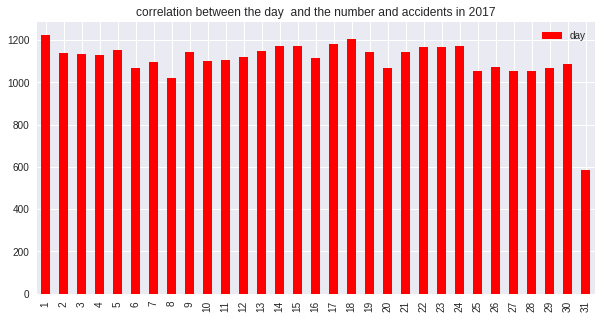

In [0]:
#@title
day_sum=acci['day'].value_counts().to_frame()
day_sum.sort_index(inplace =True)
day_sum.plot(kind='bar', color ='red', title='correlation between the day  and the number and accidents in 2017', figsize=(10, 5), )
plt.show()

### During a twenty four hour period the most hours with the most fatal incidents are between 15:00 (3PM) and 22:00 (10 PM) The hours with the lowest fatal incident are between  08:00 (AM )and 10:00 (AM) and 03:00 (AM) and 05:00 (AM)  We can explain the reason why it is not from 03:00 to 10:00 by noting that the majority of individuals in the United States are heading to work or school between 5 AM and 8 AM.  

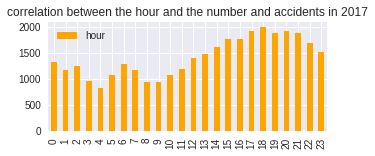

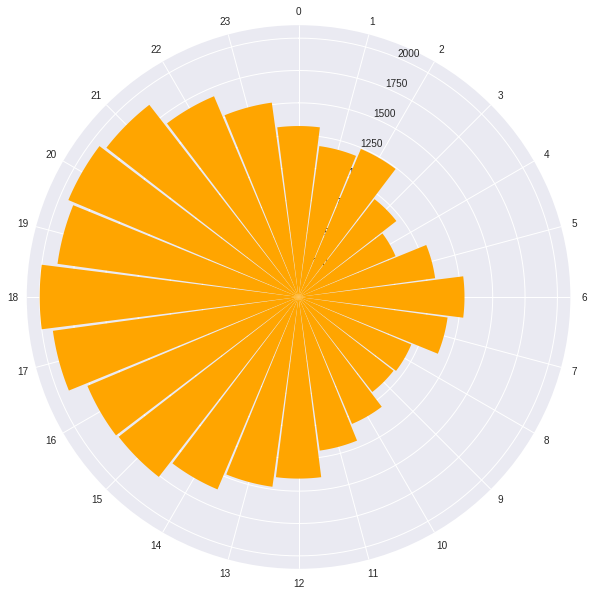

In [0]:
#@title
hour_sum.plot(kind='bar', color ='orange', title='correlation between the hour and the number and accidents in 2017', figsize=(5, 2), )
plt.show()

plt.figure(figsize=(10,10))

ax = plt.subplot(111, polar=True)
equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones =hour_sum['hour']
ax.bar(np.deg2rad(equals), ones, color ='orange', width =.25)       

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

plt.show()

# Are there specific dates and states drivers should avoid driving to avoid being a part of fatal accidents?

### The data from 2017 points towards ten dates that had the most fatalities in the United States.  The date with the highest number of incidents was July 15th.  To better understand this statistic we would need to know more about the weather across the nation on that day and research possible alternative factors affecting that day in particular along with all the rest of the days with higher than normal fatal accidents. 

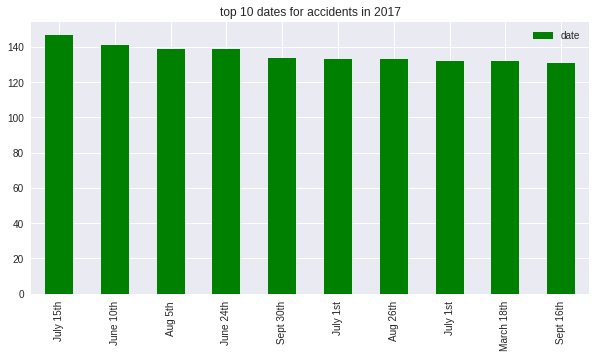

In [0]:
#@title
acci['date'].value_counts()[:10].to_frame().plot(kind='bar', color ='green', title='top 10 dates for accidents in 2017', figsize=(10, 5))
plt.xticks(np.arange(10),('July 15th','June 10th', 'Aug 5th', 'June 24th', 'Sept 30th', 'July 1st', 'Aug 26th', 'July 1st', 'March 18th', 'Sept 16th'))
plt.show()




In [0]:
#@title
acci_graph=acci
acci_graph2 = acci2
acci_graph['state'] = acci['state'].apply(lambda x: state_id[x]).astype('category')
acci_graph2['state'] = acci2['state'].apply(lambda x: state_id2[x]).astype('category')


In [0]:
#@title
acci_mo_sta_fat = acci.groupby(['state', 'month'])['fatalities'].sum().unstack(fill_value=0).reindex(columns=month_id)

# What Months have higher fatal incidents for each state?

### Based on the data California, Texas and Florida have the highest rates of fatal accidents each month.  But you can see from this cross table that the rest of the states do have months that have higher rates of incidents. 


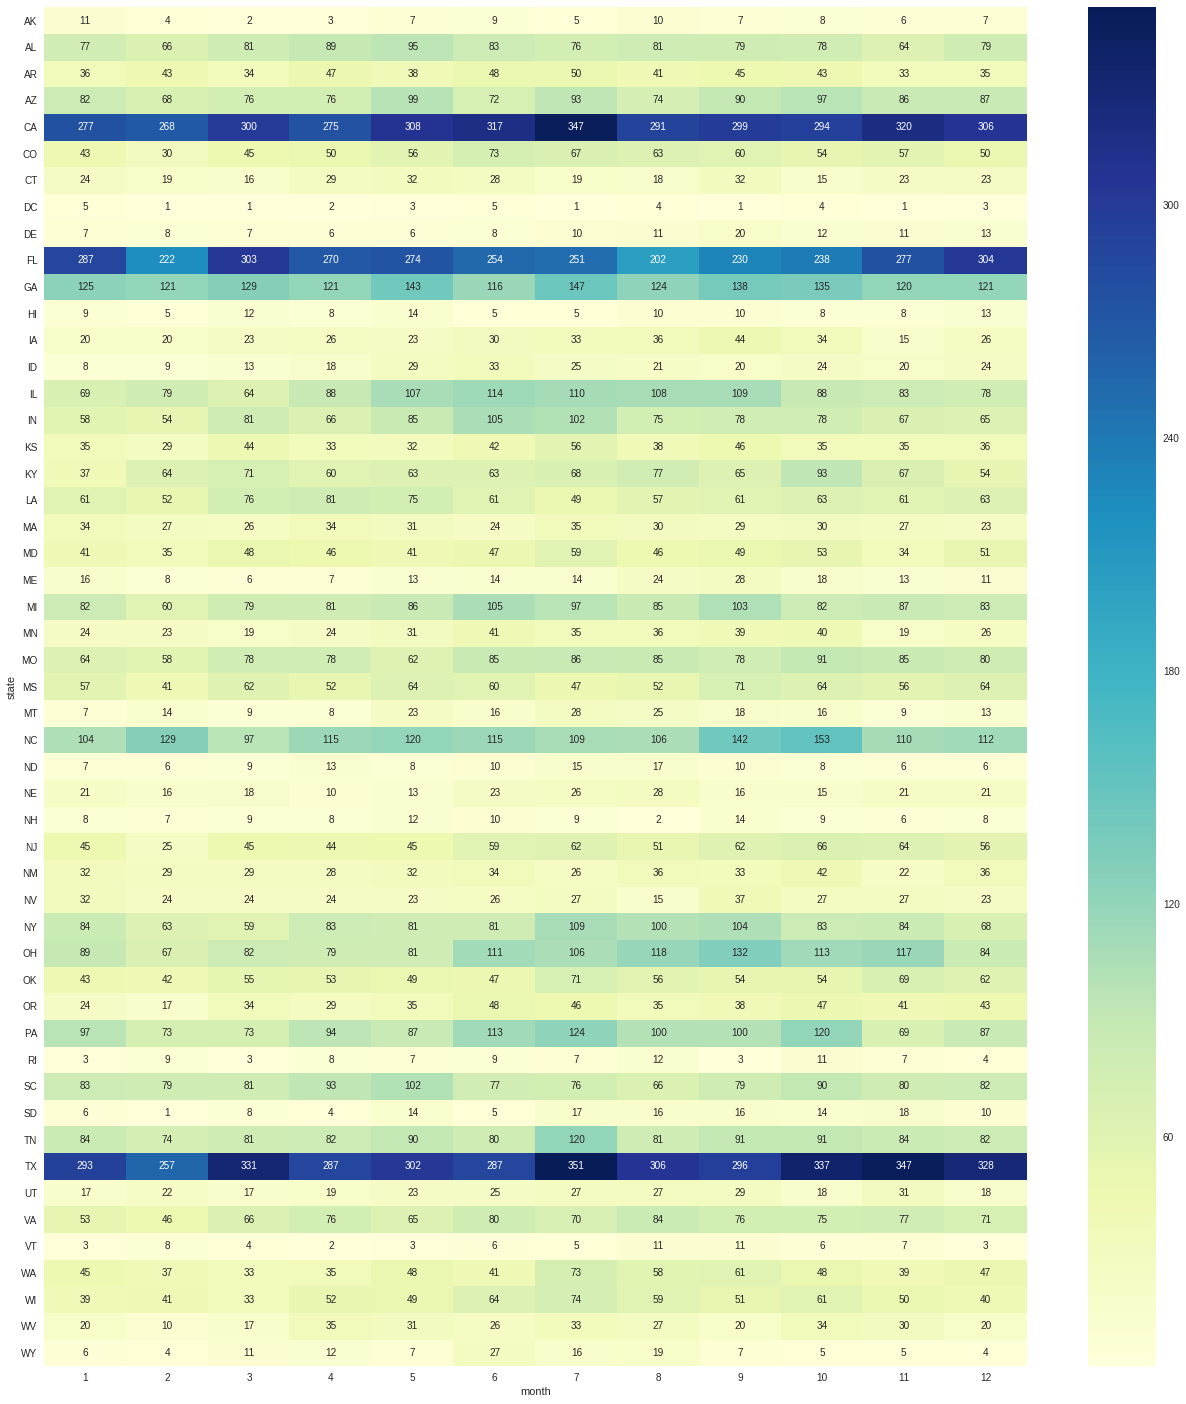

In [0]:
#@title

plt.figure(figsize=(22,25))
sns.heatmap(acci_mo_sta_fat, annot=True, fmt="d", cmap="YlGnBu")
#sns.heatmap(acci_mo_sta_fat, annot=True, fmt="d", linewidths=.8)
plt.yticks(rotation=0)
plt.xticks(rotation=0, )
plt.show()

In [0]:
#@title
winter = [12,1,2]
spring = [3,4,5]
summer = [6,7,8]
fall   = [9,10,11]

In [0]:
#@title
acci_winter = acci_graph.loc[acci['month'].isin(winter)]
acci_spring = acci_graph.loc[acci['month'].isin(spring)]
acci_summer = acci_graph.loc[acci['month'].isin(summer)]
acci_fall = acci_graph.loc[acci['month'].isin(fall)]



acci_winter_graph = acci_winter.groupby(['state'])['fatalities'].sum().sort_values(ascending=False)
acci_spring_graph = acci_spring.groupby(['state'])['fatalities'].sum().sort_values(ascending=False)
acci_summer_graph = acci_summer.groupby(['state'])['fatalities'].sum().sort_values(ascending=False)
acci_fall_graph = acci_fall.groupby(['state'])['fatalities'].sum().sort_values(ascending=False)


In [0]:
#@title
#acci_winter_graph.head(100)

In [0]:
#@title
#acci.head(10)

# Is there a correlation between the number of vehicles and the number of fatalities in an incident?

### We might predict that the higher the number of vehicles involved the more fatalities we might see.  However, the exact opposit is true.  For 2017 the number of fatalities actually decreased (excluding some outliers).  This may be related to the fact that as other drivers see the accident occuring they are slowing down to avoid the accident and in instances where one car collides with many they are not traveling very fast if at all. 

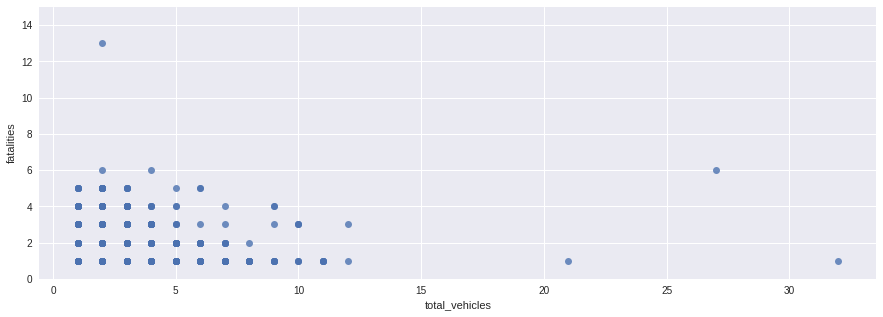

In [0]:
#@title
#create the graphic showing the relationship between the number of vehicles and fatalities
plt.figure(figsize=(15,5))
sns.regplot(x=acci['total_vehicles'], y=acci['fatalities'],fit_reg=False)
plt.ylim(0,15)
plt.show()


In [0]:
#@title
#fatal_vs_vehicles = pd.crosstab(acci['total_vehicles'],acci['fatalities'])
#plt.figure(figsize=(10,5))
#sns.heatmap(fatal_vs_vehicles[:50], annot=True, fmt="d", cmap="YlGnBu")
#sns.heatmap(fatal_vs_vehicles, annot=True, fmt="d", linewidths=.8)
#plt.yticks(rotation=0)
#plt.xticks(rotation=0, )
#plt.show()

# Further Research

### After working on this data project there are a few areas I would take this project.  I think it would be interesting to incoporate the age and driving experience of the drivers for the data. I also would like to explore the geographical and climate related data in regards to terrain and road temperatures.  One area that also needs more attention is jurisdiction based data, county/city/state laws, speed limits, road condition.  I think looking into the correlation between jurisdiction data and fatal incidents may also shine some light on why certain states and cities have higher rates of fatal accidents.  As I mentioned above I would l like to also look into why specific dates had higher incidences of fatal accidents.  I would also add that taking this data and expanding it to include an entire decade or all the available years while also incorporating population data and presence of specific vehicle safety technology would be helpful.  Utilizing machine learning to predict the conditions that are the most likely to result in fatal accidents and to create advisories based on live data about road conditions, traffic patterns and changing weather.  I think this would also be helpful for individuals looking at self driving cars as a means to identify needed algorhythm changes and also provide a means of justifying self driving cars. 